# Direct Comparison MUT T0 v T1
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData
from scipy.stats import pearsonr, spearmanr

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t1 = adata[adata.obs.time_point == 'T1']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "MAFA"]
#rename T0 to control
subset_t0.obs.condition = "Control"

subset_t1 = subset_t1[subset_t1.obs.condition == "MAFA"]
#combine
adata = ad.concat([subset_t0, subset_t1], axis = 0)

adata.obs

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/generic.py:6234: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


,condition,time_point,DOX
MAFAS64F_010,Control,T0,N
MAFAS64F_011,Control,T0,N
MAFAS64F_012,Control,T0,N
MAFAS64F_016,MAFA,T1,Y
MAFAS64F_017,MAFA,T1,Y
MAFAS64F_018,MAFA,T1,Y


## Quality Control

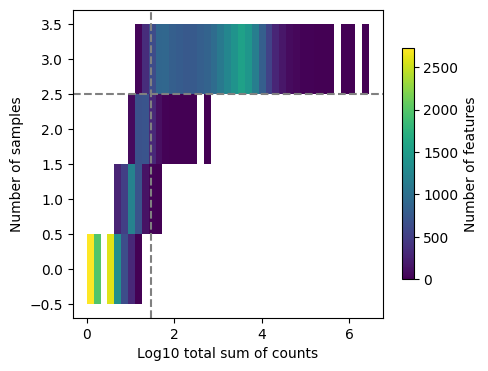

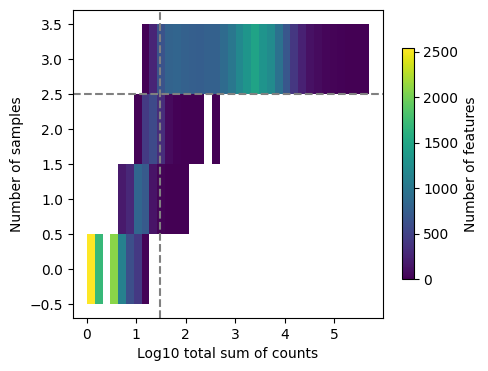

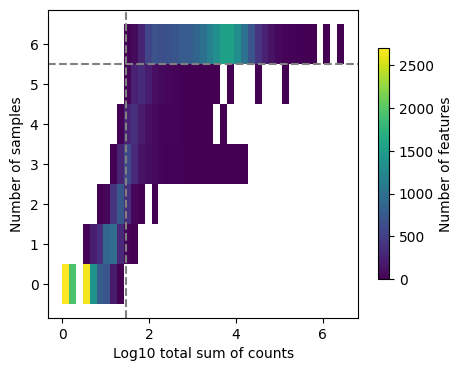

In [7]:
#check various filter points
dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(subset_t1, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15291

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 15291
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 18.74 seconds.

Fitting dispersion trend curve...
... done in 4.12 seconds.

Fitting MAP dispersions...
... done in 23.76 seconds.

Fitting LFCs...
... done in 1.70 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 0.96 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,470919.218750,-2.861741,0.159506,-17.941286,5.614041e-72,2.033560e-70
MT-CO1,220314.921875,-0.425720,0.311272,-1.367676,1.714134e-01,2.356742e-01
GCG,172270.578125,-3.149095,0.545626,-5.771526,7.855689e-09,2.962064e-08
INS,164343.625000,-2.290425,0.396917,-5.770542,7.901703e-09,2.978679e-08
MT-ND4,101241.960938,-0.233198,0.300119,-0.777021,4.371465e-01,5.218039e-01
...,...,...,...,...,...,...
CLTRN,13.905749,0.706216,0.319531,2.210162,2.709392e-02,4.627461e-02
CD101,17.855339,0.732954,0.506730,1.446438,1.480544e-01,2.076865e-01
AL157834.1,12.302304,0.096649,0.564435,0.171231,8.640423e-01,8.997719e-01


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 4.17 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,470919.218750,0.153355,0.221029,-17.941286,5.614041e-72,2.033560e-70
MT-CO1,220314.921875,2.627221,0.483122,-1.367676,1.714134e-01,2.356742e-01
GCG,172270.578125,0.187263,0.579187,-5.771526,7.855689e-09,2.962064e-08
INS,164343.625000,0.547441,0.500315,-5.770542,7.901703e-09,2.978679e-08
MT-ND4,101241.960938,-0.258527,0.305226,-0.777021,4.371465e-01,5.218039e-01
...,...,...,...,...,...,...
CLTRN,13.905749,-0.144270,0.788046,2.210162,2.709392e-02,4.627461e-02
CD101,17.855339,0.554948,0.485600,1.446438,1.480544e-01,2.076865e-01
AL157834.1,12.302304,0.065497,0.504962,0.171231,8.640423e-01,8.997719e-01


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,470919.218750,0.153355,0.221029,-17.941286,5.614041e-72,2.033560e-70
MT-CO1,220314.921875,2.627221,0.483122,-1.367676,1.714134e-01,2.356742e-01
GCG,172270.578125,0.187263,0.579187,-5.771526,7.855689e-09,2.962064e-08
INS,164343.625000,0.547441,0.500315,-5.770542,7.901703e-09,2.978679e-08
MT-ND4,101241.960938,-0.258527,0.305226,-0.777021,4.371465e-01,5.218039e-01
...,...,...,...,...,...,...
CLTRN,13.905749,-0.144270,0.788046,2.210162,2.709392e-02,4.627461e-02
CD101,17.855339,0.554948,0.485600,1.446438,1.480544e-01,2.076865e-01
AL157834.1,12.302304,0.065497,0.504962,0.171231,8.640423e-01,8.997719e-01


In [19]:
##!pip install adjustText

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


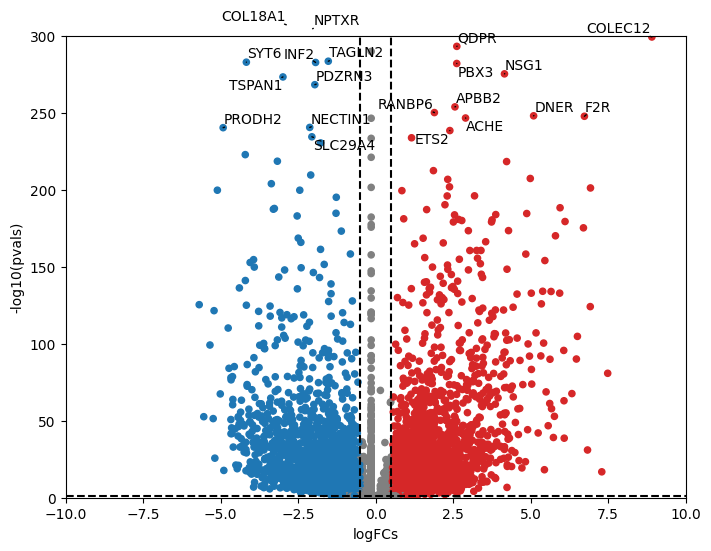

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.savefig('../figures/direct/MUT_T0_T1/volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,MT-TS2,AC114490.3,AC007285.1,GTF2H4,HMGA1P8,CLTRN,CD101,AL157834.1,RERGL,ANKRD31
treatment.vs.control,-17.941286,-1.367676,-5.771526,-5.770542,-0.777021,0.356228,-8.762285,-2.581819,-0.954959,-1.18531,...,0.586068,0.016343,1.432002,-0.200698,0.404022,2.210162,1.446438,0.171231,2.514564,-0.019256


### Transcription factor activity inference

In [22]:
collectri = pd.read_csv("collectri.csv")
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [23]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

Running ulm on mat with 1 samples and 15291 targets for 639 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.68874,-3.279613,-0.395573,-1.511321,-0.647765,-0.524361,1.624518,-0.089731,-0.097181,-2.160447,...,-1.341415,-1.85977,-0.660941,-0.731693,-0.455406,1.00819,-1.047744,-0.036699,-0.740701,-0.525942


# Filter new Table by the LFC and adjpvalue from DE table above

In [24]:
#Not all TF are in the list?
selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ABL1,3590.213623,-0.838544,0.147151,-5.795339,6.818319e-09,2.585582e-08
AHR,1300.320801,-2.389936,0.313661,-7.883265,3.189363e-15,1.849492e-14
AHRR,356.498077,0.626622,0.252325,2.644335,8.185169e-03,1.551434e-02
AIP,1264.106323,0.452373,0.123549,3.727963,1.930334e-04,4.715099e-04
APEX1,2185.635010,-1.119218,0.107179,-10.541691,5.549173e-26,5.385692e-25
...,...,...,...,...,...,...
ZNF395,931.585876,-0.053416,0.645670,-0.142840,8.864168e-01,9.155248e-01
ZNF436,335.329132,-0.050252,0.196168,-0.265755,7.904277e-01,8.414568e-01
ZNF699,63.954067,-0.549505,0.282431,-2.110465,3.481836e-02,5.805973e-02


In [25]:
# make selectable for various threshold values
Threshold_LFC = 0.5
Threshold_padj = 0.05
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ABL1,3590.213623,-0.838544,0.147151,-5.795339,6.818319e-09,2.585582e-08
AHR,1300.320801,-2.389936,0.313661,-7.883265,3.189363e-15,1.849492e-14
AHRR,356.498077,0.626622,0.252325,2.644335,8.185169e-03,1.551434e-02
APEX1,2185.635010,-1.119218,0.107179,-10.541691,5.549173e-26,5.385692e-25
AR,203.263672,2.158959,0.408818,5.614836,1.967493e-08,7.193277e-08
...,...,...,...,...,...,...
ZFPM1,1235.194336,-1.837209,0.158712,-11.717112,1.041631e-31,1.235249e-30
ZMYND8,979.283875,-0.791853,0.108155,-7.400814,1.353519e-13,7.107486e-13
ZNF143,348.945679,-0.502992,0.110334,-4.618034,3.873931e-06,1.140322e-05


In [26]:
#get TF data too
tf_data = new_table.loc[subset_padj.index]
tf_data
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
complete_table
#save
complete_table.to_csv('../figures/direct/MUT_T0_T1/table_comparison_MUT_01.csv')

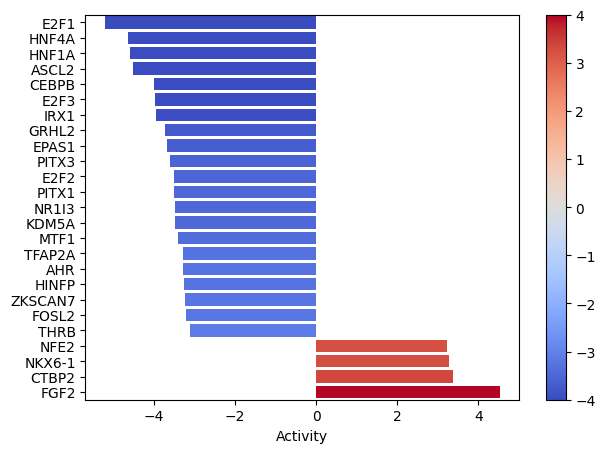

In [27]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/MUT_T0_T1/tf_activities.png'
)

In [28]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/MUT_T0_T1/top25_tfs.csv')
long_df

,TFs,value
1,E2F1,-5.202488
2,HNF4A,-4.636414
3,HNF1A,-4.593435
4,FGF2,4.526025
5,ASCL2,-4.511618
6,CEBPB,-4.00411
7,E2F3,-3.982157
8,IRX1,-3.939327
9,GRHL2,-3.728904
10,EPAS1,-3.682676


# TF Activity with MLM

In [29]:
tf_acts_MLM, tf_pvals_MLM, = dc.run_mlm(mat=mat, net=collectri, verbose=True)
tf_acts_MLM

Running mlm on mat with 1 samples and 15291 targets for 639 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.247969,-1.672202,-0.309705,-1.805976,-0.018958,1.17804,2.126653,1.696615,0.077648,-0.502242,...,-1.08212,-0.127239,0.833871,-0.567721,-0.289835,1.896103,-0.120933,0.184476,-0.942462,-0.892301


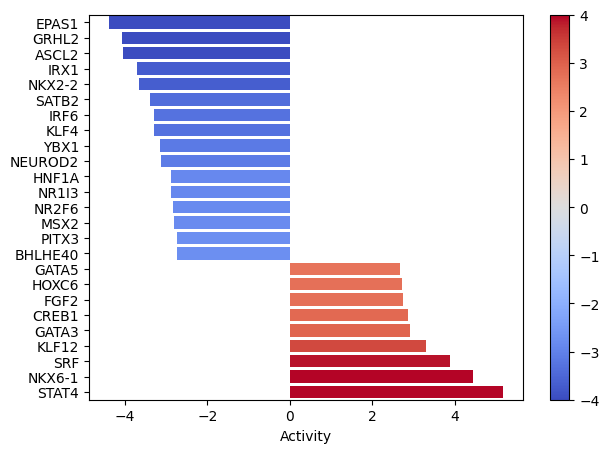

In [30]:
dc.plot_barplot(
    tf_acts_MLM,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/MUT_T0_T1/T01_tf_activities_MLM.png'
)

# Compare ULM and MLM results correlations

In [31]:
pearson_r, pearson_p = pearsonr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())
spearman_r, spearman_p = spearmanr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())

print(f"Pearson correlation: {pearson_r:.2f} (p-value: {pearson_p:.2e})")
print(f"Spearman correlation: {spearman_r:.2f} (p-value: {spearman_p:.2e})")

Pearson correlation: 0.68 (p-value: 1.42e-88)
Spearman correlation: 0.64 (p-value: 1.65e-75)


# Find overlap in (Top 25)

In [32]:
ulm_top_25 = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
mlm_top_25 = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
len(set(ulm_top_25)&set(mlm_top_25)) / float(len(set(ulm_top_25) | set(mlm_top_25))) * 100

28.205128205128204

# Find overlap in top 10% (Top 65)

In [33]:
ulm_top = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts.T) * 0.1)).index
mlm_top = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts_MLM.T) * 0.1)).index
#len(set(ulm_top)&set(mlm_top)) #length of overlap of both
#float(len(set(ulm_top))) #lengh of first list
# set(mlm_top))) * 100 scale to %
len(set(ulm_top)&set(mlm_top)) / float(len(set(ulm_top) | set(mlm_top))) * 100

27.27272727272727

# Save activity scores

In [34]:
tf_acts_MLM.index =["mlm_MUT_01"]
tf_acts_MLM.to_csv("MUT_01_tf_activity_scores.csv")

In [35]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/direct/MUT_T0_T1/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/direct/MUT_T0_T1/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/direct/MUT_T0_T1/MAFA_targets.png')
#

# Plot Networks

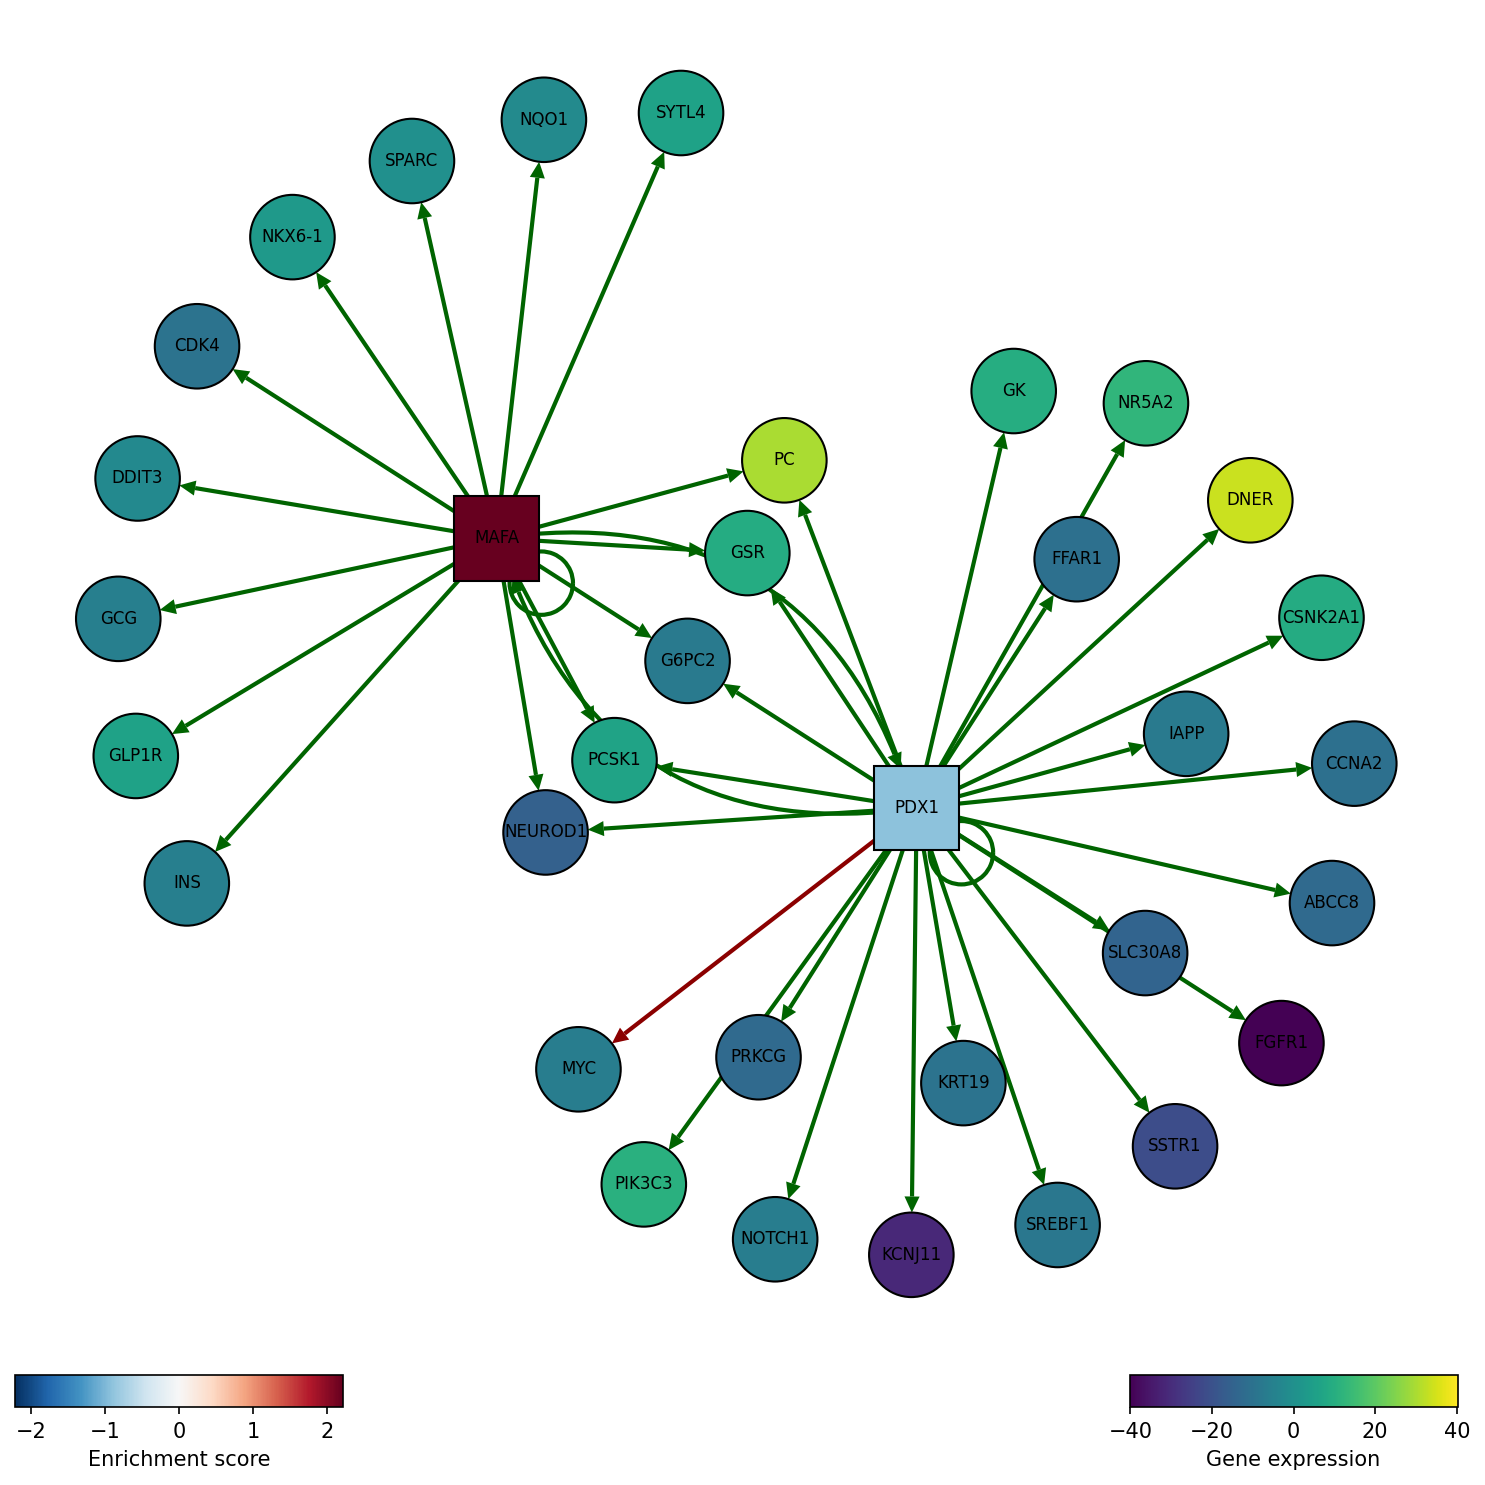

In [36]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=["PDX1", "MAFA"],
    n_targets=25,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/direct/MUT_T0_T1/plot_networks.png'
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


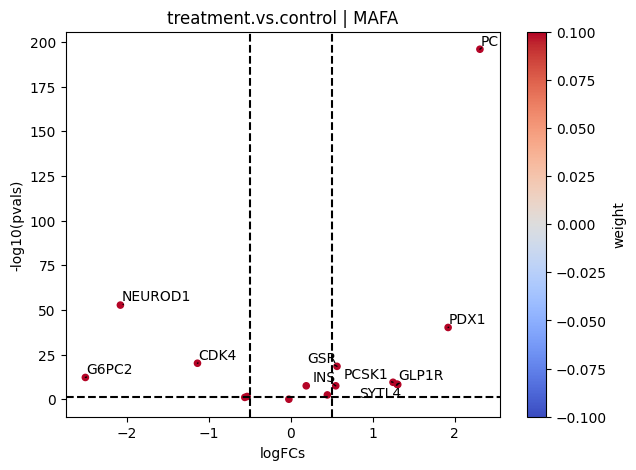

In [37]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [38]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [39]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts.index=['Activity_score']
pathway_pvals.index=['pval']
pathway_all = pd.concat([pathway_acts, pathway_pvals])
pathway_all

Running mlm on mat with 1 samples and 15291 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
Activity_score,1.750336,0.094664,0.296782,0.833546,-4.523353,-0.332767,0.665838,-2.417686,-0.651656,-0.828480,-0.245007,-0.290308,-1.919551,0.786407
pval,0.080080,0.924583,0.766637,0.404550,0.000006,0.739315,0.505525,0.015631,0.514633,0.407412,0.806454,0.771584,0.054933,0.431641


In [40]:
pathway_all=pathway_all.T.sort_values(by="Activity_score",ascending=False)
pathway_all.to_csv('../figures/direct/MUT_T0_T1/top_pathways.csv')
pathway_all

,Activity_score,pval
Androgen,1.750336,0.080080
Hypoxia,0.833546,0.404550
p53,0.786407,0.431641
NFkB,0.665838,0.505525
Estrogen,0.296782,0.766637
EGFR,0.094664,0.924583
Trail,-0.245007,0.806454
VEGF,-0.290308,0.771584
MAPK,-0.332767,0.739315
TGFb,-0.651656,0.514633


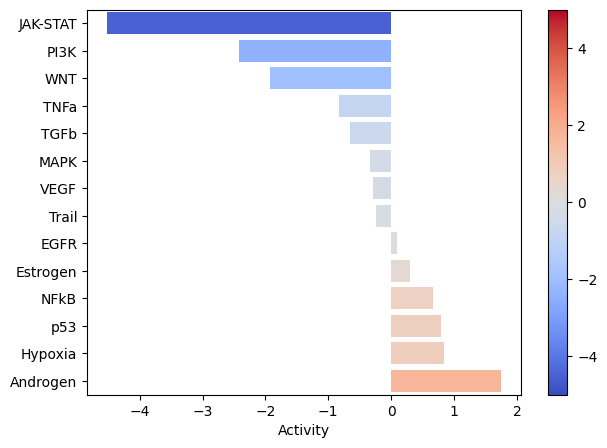

In [42]:
pathway_acts.index=['treatment.vs.control']
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save='../figures/direct/MUT_T0_T1/pathway_activities.png'
)

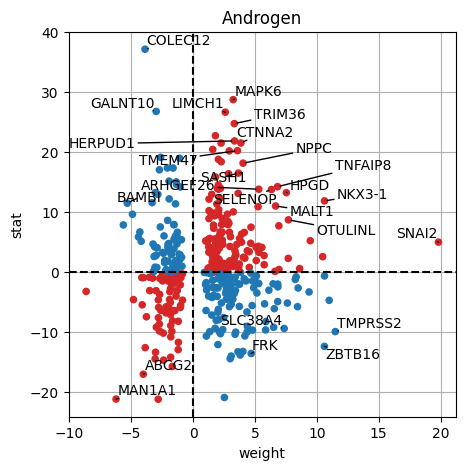

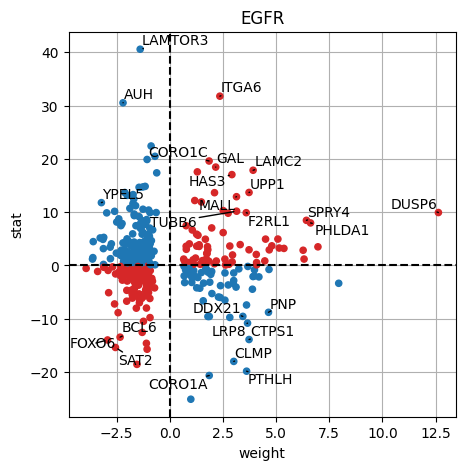

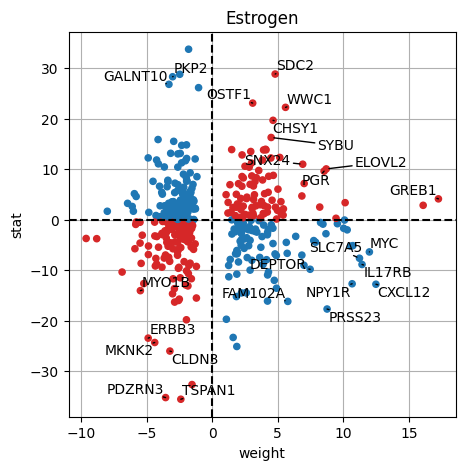

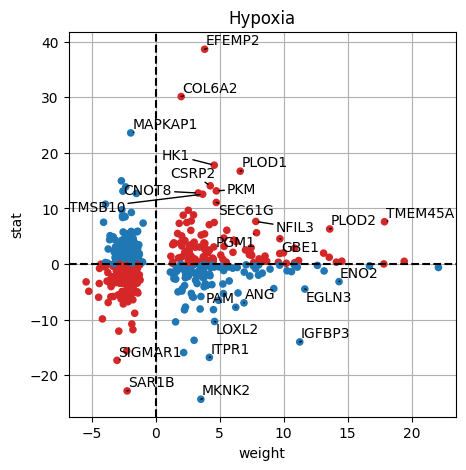

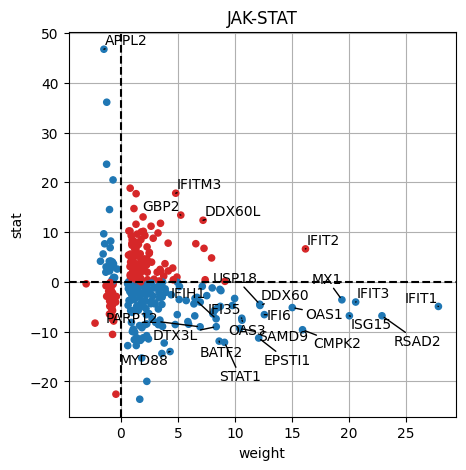

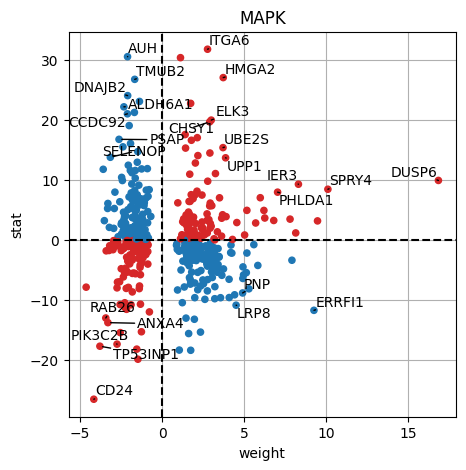

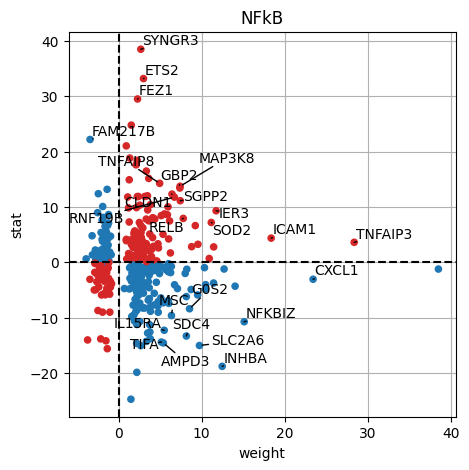

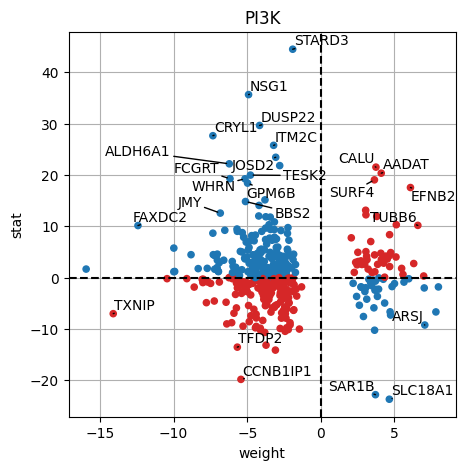

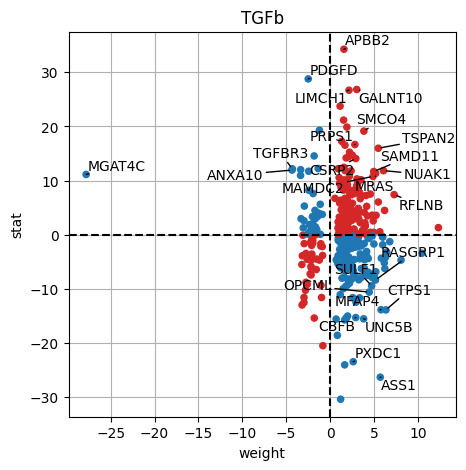

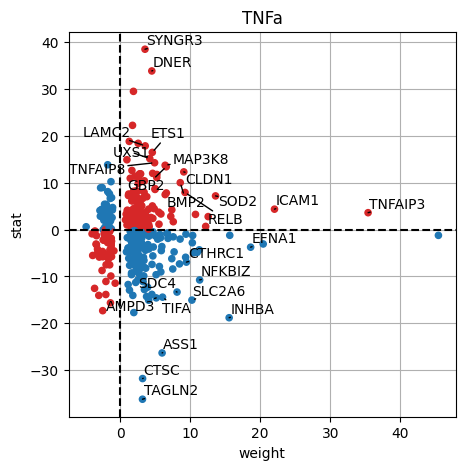

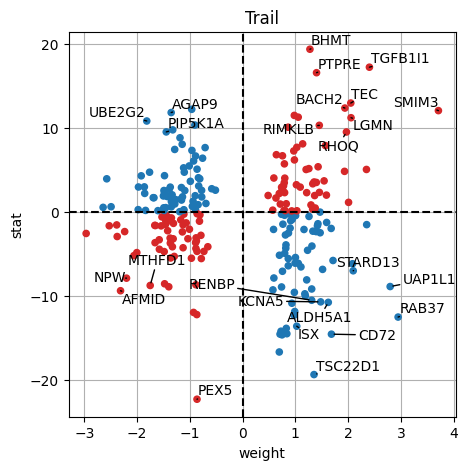

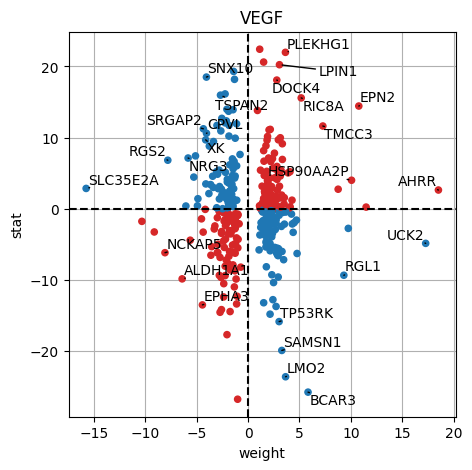

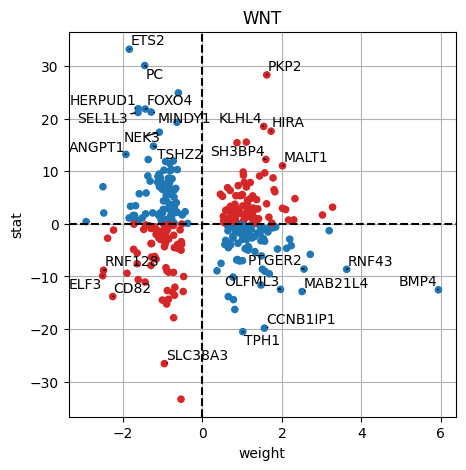

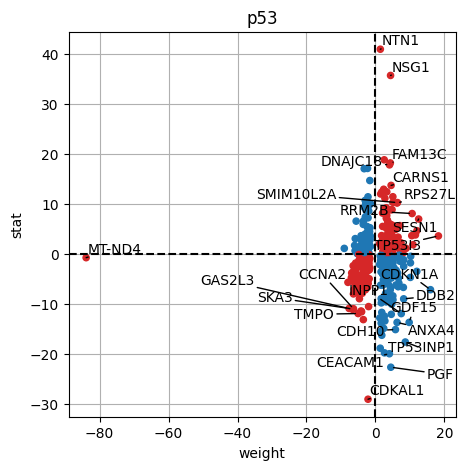

In [43]:
#Plot Targets for all pathways
for pathway in pathway_acts:
    dc.plot_targets(results_df, stat='stat', source_name=pathway, net=progeny, top=25, save=f'../figures/direct/MUT_T0_T1/{pathway}_targets.png')

### Funtional enrichment of Biological Terms

In [ ]:
# # The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
# msigdb = dc.get_resource('MSigDB')
# msigdb

In [ ]:
# msigdb['collection'].unique()

In [ ]:
# # Filter by hallmark
# msigdb = msigdb[msigdb['collection']=='hallmark']

# # Remove duplicated entries
# msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# # Rename
# msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

# msigdb